In [27]:
import pandas as pd
import seaborn as sns

In [28]:
data=pd.read_csv("D:\\college notes\\6 sem notes\\Data mining\\Dataset11-Weather-Data.csv")
print(data.head())
print(data.shape)

       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  
(8784, 8)


In [29]:
print(data.Weather.value_counts())
print(data.Weather.nunique())

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

## Converting Weather Categories into Standard Categories

In [30]:
from itertools import chain
x="Thunderstorms, Moderate Rain Showers, Fog"
def Create_list(x):
    list_of_lists=[w.split() for w in x.split(",")]
    flat_list=list(chain(*list_of_lists))
    return flat_list

def Get_Weather(list1):
    if "Fog" in list1 and "Rain" in list1:
        return "RAIN+FOG"
    elif "Snow" in list1 and "Rain" in list1:
        return "SNOW+RAIN"
    elif "Snow" in list1:
        return "SNOW"
    elif "Rain" in list1:
        return "RAIN"
    elif "Fog" in list1:
        return "FOG"
    elif "Clear" in list1:
        return "CLEAR"
    elif "Cloudy" in list1:
        return "CLOUDY"
    else:
        return "RAIN"
print(Create_list(x))

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']


In [31]:
data["Std_Weather"]=data["Weather"].apply(
    lambda x : Get_Weather(Create_list(x)))
data.Std_Weather.value_counts()

CLOUDY       3797
CLEAR        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: Std_Weather, dtype: int64

## Sample Selection and Data Balancing

In [32]:
cloudy_df_sample=data[data["Std_Weather"]=="CLOUDY"].sample(600)
clear_df=data[data['Std_Weather'] == 'CLEAR'].sample(600)
rain_df = data[data['Std_Weather'] =="RAIN"]
snow_df = data[data["Std_Weather"]=="SNOW"]
fog_df = data[data["Std_Weather"]=="FOG"]

## Create new Weather Dataset

In [33]:
weather_df = pd.concat([
    cloudy_df_sample,clear_df,rain_df,snow_df,fog_df], axis=0)
print(weather_df.shape)
print(weather_df.Std_Weather.value_counts())

(2600, 9)
RAIN      603
CLOUDY    600
CLEAR     600
SNOW      556
FOG       241
Name: Std_Weather, dtype: int64


## Drop Cloumns data and Weather

In [34]:
weather_df.drop(columns = ['Date/Time', 'Weather'],axis=1,inplace=True)

## NUll / Missing Values

In [35]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

## Data Visualization

## Correlation among the features

In [36]:
cols=['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 
      'Visibility_km','Press_kPa']
cor_matrix=weather_df[cols].corr()
cor_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.942619,-0.212149,-0.120101,0.366524,-0.093406
Dew Point Temp_C,0.942619,1.000000,0.120493,-0.139562,0.146003,-0.184420
Rel Hum_%,-0.212149,0.120493,1.000000,-0.055551,-0.691119,-0.271327
Wind Speed_km/h,-0.120101,-0.139562,-0.055551,1.000000,-0.041089,-0.391709
Visibility_km,0.366524,0.146003,-0.691119,-0.041089,1.000000,0.262238
Press_kPa,-0.093406,-0.184420,-0.271327,-0.391709,0.262238,1.000000


## Heat Map

<AxesSubplot:>

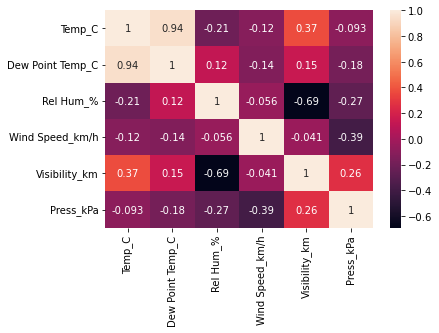

In [37]:
sns.heatmap(cor_matrix, annot=True)

## Label Encoding

converting target variable into numeric

In [38]:
from sklearn.preprocessing import LabelEncoder
label_Encoder = LabelEncoder()
weather_df['Std_Weather']=label_Encoder.fit_transform(
    weather_df['Std_Weather'])
weather_df.head(100)
weather_df['Std_Weather'].unique()
cloudy_df_sample,clear_df,rain_df,snow_df,fog_df

(             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
 182     1/8/2012 14:00    -6.5             -12.0         65               19   
 6640   10/3/2012 16:00    19.2              14.2         73               11   
 7801   11/21/2012 1:00     0.6              -2.3         81                6   
 5460   8/15/2012 12:00    23.7              17.8         70                7   
 7862  11/23/2012 14:00    10.4               1.5         54               24   
 ...                ...     ...               ...        ...              ...   
 6694   10/5/2012 22:00    17.4              12.1         71               19   
 1156    2/18/2012 4:00    -0.3              -4.9         71               22   
 973    2/10/2012 13:00     1.3              -4.7         64               24   
 3338    5/19/2012 2:00    13.1               8.3         73                7   
 7535   11/9/2012 23:00     4.0               0.8         80               15   
 
       Visibility_km  Pres

## x,y variables

In [39]:
# Independent Variables
x=weather_df.drop(["Std_Weather"],axis=1)
#Target variables:
y=weather_df["Std_Weather"]
print(x.head())
y.head()
print(y)

      Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  Visibility_km  \
182     -6.5             -12.0         65               19           24.1   
6640    19.2              14.2         73               11           24.1   
7801     0.6              -2.3         81                6           25.0   
5460    23.7              17.8         70                7           24.1   
7862    10.4               1.5         54               24           48.3   

      Press_kPa  
182      101.97  
6640     101.42  
7801     101.82  
5460     100.73  
7862      99.71  
182     1
6640    1
7801    1
5460    1
7862    1
       ..
8716    2
8717    2
8718    2
8719    2
8722    2
Name: Std_Weather, Length: 2600, dtype: int32


## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X_std=std_scaler.fit_transform(x)
X_std

array([[-1.18682788, -1.35278116, -0.59801309,  0.32747782,  0.21508684,
         1.23474052],
       [ 1.15885659,  1.19889402, -0.09501369, -0.5295351 ,  0.21508684,
         0.63736561],
       [-0.53879832, -0.40807699,  0.40798572, -1.06516817,  0.28508729,
         1.07182009],
       ...,
       [-1.85311179, -1.67417536,  0.84811019, -1.2794214 , -0.90492029,
         0.45272246],
       [-1.94438356, -1.78130676,  0.84811019, -0.95804155, -1.03714336,
         0.42013837],
       [-1.68882261, -1.479391  ,  0.97386005, -0.95804155, -1.16158859,
         0.34410884]])

## Splitting Data into training and testing 

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((2080, 6), (520, 6))

## Model Building

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr_model = LogisticRegression()
dt_model=DecisionTreeClassifier()
rf_model=RandomForestClassifier()

## Model Training

In [43]:
print(lr_model.fit(x_train,y_train))
print(dt_model.fit(x_train,y_train))
print(rf_model.fit(x_train,y_train))

D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()


## Model Prediction

In [44]:
y_pred_lr=lr_model.predict(x_test)
y_pred_dt=dt_model.predict(x_test)
y_pred_rf=rf_model.predict(x_test)
print(y_pred_lr)

[3 3 0 4 3 4 1 1 0 4 4 3 0 4 1 0 3 3 3 0 4 4 4 3 4 1 4 3 0 0 1 4 0 1 2 3 1
 3 4 3 3 0 3 4 4 0 2 3 4 1 1 0 0 3 3 3 4 0 2 1 1 3 0 2 3 3 3 4 3 2 3 0 0 0
 3 3 4 0 3 3 4 0 3 1 2 2 0 3 3 3 0 0 1 4 4 3 2 0 0 1 2 3 1 3 1 3 4 0 0 1 0
 4 3 4 3 3 0 3 3 1 3 2 0 0 0 3 2 0 0 4 4 1 4 4 4 1 1 4 2 1 4 4 4 0 4 2 1 0
 4 3 3 4 3 4 0 4 3 0 1 4 0 3 2 0 0 0 1 4 1 0 1 0 1 1 4 3 0 1 2 4 2 0 0 4 4
 0 2 0 4 0 0 3 4 4 3 2 4 3 4 0 1 4 0 0 0 1 3 0 3 0 2 4 4 1 0 0 3 4 3 1 2 3
 3 0 4 3 3 1 3 3 3 0 4 2 4 4 4 0 1 0 3 3 2 1 1 3 0 0 0 0 0 0 2 2 2 1 4 4 0
 4 4 4 3 4 0 0 1 3 0 2 0 1 0 0 0 2 1 3 3 3 4 0 4 0 2 3 4 4 3 3 0 0 0 4 0 4
 4 4 2 4 4 1 0 4 0 1 4 4 4 4 4 3 4 1 3 3 4 0 3 0 3 0 4 3 0 4 1 3 4 4 4 4 0
 4 4 1 4 4 0 1 4 3 0 3 1 4 1 3 4 4 3 3 1 1 1 4 4 2 0 0 4 1 1 3 4 1 1 4 0 4
 0 0 0 0 4 0 4 1 3 0 3 3 3 4 3 3 0 4 3 1 3 4 4 4 1 4 1 3 1 4 0 2 3 4 3 3 3
 0 2 3 3 4 0 2 3 3 4 3 2 0 3 0 4 0 4 3 2 0 3 0 1 0 1 4 1 0 0 2 2 0 1 0 4 1
 4 0 0 2 4 3 0 3 0 1 0 0 1 3 1 0 4 3 1 4 1 3 3 3 2 3 3 3 3 2 1 2 3 4 3 4 2
 1 4 3 0 1 0 4 0 1 1 4 4 

In [45]:
l = [[25,14,52,6,16,1015]]
y_pred = dt_model.predict(l)
print(y_pred)

[0]


D:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Model Evaluation

In [49]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix,
    accuracy_score, precision_score,
    recall_score,f1_score)

## Accuracy

In [47]:
print(accuracy_score(y_test,y_pred_lr))
print(accuracy_score(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_rf))

0.5769230769230769
0.6192307692307693
0.7


## Confusion Matrix

AxesSubplot(0.125,0.125;0.62x0.755)


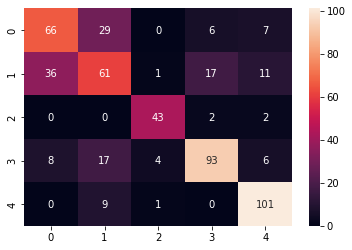

In [48]:
cm_rf=confusion_matrix(y_test,y_pred_rf)
print(sns.heatmap(cm_rf,annot=True,fmt='d'))

In [56]:
precision = precision_score(y_test,y_pred_rf,average="macro")
recall = recall_score(y_test,y_pred_rf,average="macro")
f1score = f1_score(y_test,y_pred_rf,average="macro")

print(f"Precision = {precision.round(4)}")
print(f"Recall = {recall.round(4)}")
print(f"F1 Score = {f1score.round(4)}")

Precision = 0.7174
Recall = 0.7293
F1 Score = 0.7221
